<a href="https://colab.research.google.com/github/aliasyafiekayusaini/yayayusaini/blob/main/Data_and_Analytics_Capstone_Project_ALIA_SYAFIEKA_YUSAINI_(latestfile)_Learners_Copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Functional Capstone Project - Data & Analytics



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Business Context

**Infini Telco** is a prominent player in the telco industry with a strong presence in Malaysia. Specializing in B2B sales, they serve as a vital link in the supply chain, facilitating the distribution of telecommunication and technology products to retailers, service providers, and other businesses across the continent.

Despite their market dominance and expansive product offerings, the company faces critical business challenge related to marketing strategy. A key aspect of this involves the ***identification and segmentation of their customer base into well-defined segments based on discernible patterns in product purchase behaviour and understand their product portfolio.*** By understanding the distinct needs, preferences, and purchasing habits of different customer segments, the client can develop targeted marketing strategies that cater to the specific needs of each segment, enhancing customer satisfaction and loyalty, driving revenue growth.




## Business Challenges

- No streamlined process to handle data and data is only available in chunks
- Limited intel on customer purchase patterns to drive targeted marketing
- Inadequate product insights across different customer groups


## Project Objectives

The business needs your help as a ***data analyst*** to overcome these challenges. Apply your data analytics skillset learnt.



### 1. Data Preprocessing

Data preparation is a critical process first step, involving the gathering, cleaning, transforming, and organizing of raw data into a format suitable for analysis. This step is essential for ensuring the quality and reliability of the insights derived from the data.

Here, the transaction data is provided from June 2020 to December 2022, which are stored across three separate csv files. The dataset are:

- Transactions_1.csv
- Transactions_2.csv
- Transactions_3.csv

***Task 1.1: Combine the transaction data files***

Find a way to combine the above data together into a singular dataframe, that will contain all the transactions at one place. Name this singular dataframe df_Txn_full.

In [ ]:
#Import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import warnings
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
warnings.filterwarnings("ignore")

pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_rows = 100

In [ ]:
#Import the necessary packages
import pandas as pd

# Loading the CSV files into separate DataFrames first
df_Txn1 = pd.read_csv("Transactions_1.csv")
df_Txn2 = pd.read_csv("Transactions_2.csv")
df_Txn3 = pd.read_csv("Transactions_3.csv")

# Combine them into a single DataFrame
df_Txn_full = pd.concat([df_Txn1, df_Txn2, df_Txn3], ignore_index=True)

# Display the first few rows to confirm
display(df_Txn_full.head())

<ipython-input-9-2419654097>:6: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_Txn2 = pd.read_csv("Transactions_2.csv")


,INDEX,INVOICE_NUMBER,INVOICE_ITEM,DOCUMENT_DATE,CUSTOMER_NUMBER,Main_account,Main_account_name,Main_resposible_employee_name,PRODUCT,Position_type_order_line,GROSS_TURNOVER,AMOUNT
0,33806,124289578,10,2022-10-01,14816,14816,Customer Group_0,Responsible Employee_0,000000000000100095,ZSV,0.0,1
1,65627,124317609,230,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,000000000000100095,ZSV,0.0,1
2,65628,124317609,250,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,000000000000100095,ZSV,0.0,0
3,65629,124317609,270,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,000000000000100095,ZSV,0.0,1
4,65630,124317609,290,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,000000000000100095,ZSV,0.0,1


In [ ]:
# Check basic info
df_Txn_full.info()

# check missing values
print("Missing values per column:")
print(df_Txn_full.isnull().sum())

# Check for duplicates
df_Txn_full.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353671 entries, 0 to 1353670
Data columns (total 12 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   INDEX                          1353671 non-null  int64  
 1   INVOICE_NUMBER                 1353671 non-null  int64  
 2   INVOICE_ITEM                   1353671 non-null  int64  
 3   DOCUMENT_DATE                  1353671 non-null  object 
 4   CUSTOMER_NUMBER                1353671 non-null  int64  
 5   Main_account                   1353671 non-null  int64  
 6   Main_account_name              1353671 non-null  object 
 7   Main_resposible_employee_name  1353671 non-null  object 
 8   PRODUCT                        1353671 non-null  object 
 9   Position_type_order_line       1353671 non-null  object 
 10  GROSS_TURNOVER                 1353671 non-null  float64
 11  AMOUNT                         1353671 non-null  int64  
dtypes: float64(1),

np.int64(0)

**Validation checkpoints:**
Consider, you would have received some information from the business on:

- Gross Annual Turnover for this period to be ~$1.4B
- The total unique products are ~190000
- The total customer base is ~7k

***Task 1.1.1***:

Use the above information to validate the data creation process. This is to ensure that no records of data are lost in the process.

In [ ]:
# 1. Total Gross Turnover
total_gross_turnover = df_Txn_full['GROSS_TURNOVER'].sum()
print(f"Total Gross Turnover: ${total_gross_turnover:,.2f}")

# 2. Total Unique Products
unique_products = df_Txn_full['PRODUCT'].nunique()
print(f"Total Unique Products: {unique_products}")

# 3. Total Unique Customers
unique_customers = df_Txn_full['CUSTOMER_NUMBER'].nunique()
print(f"Total Unique Customers: {unique_customers}")

Total Gross Turnover: $1,466,478,196.72
Total Unique Products: 191394
Total Unique Customers: 7130


***Task 1.2: Join the mapping files to the transaction data***


Mapping files contain supplementary detailed information that will be used for our analysis.
Use these mapping files to join with the above transaction data to create the master dataset <br><br>
**List of mapping files and their primary keys:**<br>
1. Customer Characteristics : to be joined on Customer Number
2. Customer Type Mapping : to be joined on Main Account ID
3. Product Category Mapping : to be joined on Product ID

To ensure that the joins are performed accurately, it is a good practice to clean up the columns upon which the join is performed.
Some recommended steps to clean up a column are:

- ensuring the values are of the same data type
- removing leading zeroes
- removing leading and trailing whitespaces etc.


***Task 1.2.1:***

Here, before, performing the joins, you have to perform an intermediary step to clean up the below columns based on the above recommended steps:

- customer_number
- Product
- Main_account
- Invoice_Number

*Hint: Check for any leading or trailing 0s or white spaces.*

In [ ]:
#Import the necessary packages
import pandas as pd

# Assuming you want to use df_Txn_full for cleaning
df_to_clean = df_Txn_full.copy() # Create a copy to avoid modifying the original DataFrame directly

# Strip whitespaces
df_to_clean['CUSTOMER_NUMBER'] = df_to_clean['CUSTOMER_NUMBER'].astype(str).str.strip()
df_to_clean['PRODUCT'] = df_to_clean['PRODUCT'].astype(str).str.strip()
df_to_clean['Main_account'] = df_to_clean['Main_account'].astype(str).str.strip()
df_to_clean['INVOICE_NUMBER'] = df_to_clean['INVOICE_NUMBER'].astype(str).str.strip()

# Remove leading zeros (only from 'CUSTOMER_NUMBER' and 'PRODUCT' as they are likely IDs)
df_to_clean['CUSTOMER_NUMBER'] = df_to_clean['CUSTOMER_NUMBER'].str.lstrip('0')
df_to_clean['PRODUCT'] = df_to_clean['PRODUCT'].str.lstrip('0')

# Show cleaned data (first 5 rows )
df_Txn_full[['CUSTOMER_NUMBER', 'PRODUCT', 'Main_account', 'INVOICE_NUMBER']].head(5)


,CUSTOMER_NUMBER,PRODUCT,Main_account,INVOICE_NUMBER
0,14816,000000000000100095,14816,124289578
1,17566,000000000000100095,17566,124317609
2,17566,000000000000100095,17566,124317609
3,17566,000000000000100095,17566,124317609
4,17566,000000000000100095,17566,124317609


***Task 1.2.2:***

Import the mapping files and rename the dataframe:

- Customer Characteristics.csv : df_CustChar
- Customer Type Mapping.csv : df_CustType
- Product Categories.csv : df_ProdCategories

In [ ]:
import pandas as pd

# Import mapping files and assign to specified DataFrames
df_CustChar = pd.read_csv('Customer Characteristics.csv')
df_CustType = pd.read_csv('Customer Type Mapping.csv')
df_ProdCategories = pd.read_csv('Product Categories.csv', encoding='ISO-8859-1')


In [ ]:
# Preview to confirm successful import
print("Customer Characteristics Sample:")
print(df_CustChar.head())

print("\nCustomer Type Mapping Sample:")
print(df_CustType.head())

print("\nProduct Categories Sample:")
print(df_ProdCategories.head())

Customer Characteristics Sample:
     CUSTOMER_NAME  CUSTOMER_NUMBER ACCOUNT_GROUP_TXT CVR_Company_status
0  CUSTOMER_NAME_0            35016           Debtors             Normal
1  CUSTOMER_NAME_1            38336           Debtors             Normal
2  CUSTOMER_NAME_2            38438           Debtors             Normal
3  CUSTOMER_NAME_3            45001           Debtors             Normal
4  CUSTOMER_NAME_2            45005           Debtors             Normal

Customer Type Mapping Sample:
   Main_account_ID Customer_type
0            10014           A-B
1            10025           A-B
2            10033           A-B
3            10048             D
4            10056             C

Product Categories Sample:
            ProductID  ProductCategoryID                   ProdCat2  \
0  000000010001151351                739  Web Conferencing Services   
1  000000010000802665                739  Web Conferencing Services   
2  000000000614529000                739  Web Conferencing 


***Task 1.2.3:***

To perform join on the dataframes, it is important to clean the columns to ensure that the columns are free from any special characters.

- Remove any leading or trailing 0s in Customer_Number column in the df_CustChar dataframe.
- Check for duplicates in the data and remove any duplicates.
- Create a master dataframe by performing appropriate join on df_CustChar dataframe and df_Txn_full dataframe. Rename the master dataframe as df_Master.



In [ ]:
# 1. Clean CUSTOMER_NUMBER in df_CustChar
df_CustChar['CUSTOMER_NUMBER'] = df_CustChar['CUSTOMER_NUMBER'].astype(str).str.strip().str.lstrip('0')

# 2. Remove duplicates
df_CustChar = df_CustChar.drop_duplicates(subset='CUSTOMER_NUMBER')

# 3. Join with df_Txn_full to create df_Master
# Ensure the 'CUSTOMER_NUMBER' column in df_to_clean is also object type before merging
df_to_clean['CUSTOMER_NUMBER'] = df_to_clean['CUSTOMER_NUMBER'].astype(str).str.strip().str.lstrip('0')

df_Master = pd.merge(df_to_clean, df_CustChar, on='CUSTOMER_NUMBER', how='left')

# Display the first 5 rows of the master dataframe to confirm successful join
print("Master DataFrame Preview:")
display(df_Master.head())

Master DataFrame Preview:


,INDEX,INVOICE_NUMBER,INVOICE_ITEM,DOCUMENT_DATE,CUSTOMER_NUMBER,Main_account,Main_account_name,Main_resposible_employee_name,PRODUCT,Position_type_order_line,GROSS_TURNOVER,AMOUNT,CUSTOMER_NAME,ACCOUNT_GROUP_TXT,CVR_Company_status
0,33806,124289578,10,2022-10-01,14816,14816,Customer Group_0,Responsible Employee_0,100095,ZSV,0.0,1,CUSTOMER_NAME_1429,Debtors,Normal
1,65627,124317609,230,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,0.0,1,CUSTOMER_NAME_573,Debtors,Normal
2,65628,124317609,250,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,0.0,0,CUSTOMER_NAME_573,Debtors,Normal
3,65629,124317609,270,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,0.0,1,CUSTOMER_NAME_573,Debtors,Normal
4,65630,124317609,290,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,0.0,1,CUSTOMER_NAME_573,Debtors,Normal


***Task 1.2.4:***

There is a data validation check point here. This is to ensure that you have not lost any data in the data preparation step.
Check and validate:

- Gross Annual Turnover is ~$1.4B
- The total customer base is ~7k

In [ ]:

# Validate Gross Annual Turnover
expected_turnover = 1.4e9  # 1.4 billion
calculated_turnover = df_Master['GROSS_TURNOVER'].sum()

print(f"Calculated Gross Annual Turnover: ${calculated_turnover:,.2f}")

# Check if within a range of $50 million
turnover_tolerance = 50e6
if abs(calculated_turnover - expected_turnover) <= turnover_tolerance:
    print("Gross Annual Turnover is within the expected range.")
else:
    print("Gross Annual Turnover is outside the expected range.")

# Validate total customer base
expected_customers = 7000
calculated_customers = df_Master['CUSTOMER_NUMBER'].nunique()

print(f"\nCalculated Total Customer Base: {calculated_customers}")

# Check if within a range of 500
customer_tolerance = 500
if abs(calculated_customers - expected_customers) <= customer_tolerance:
     print("Total customer base is within the expected range.")
else:
     print("Total customer base is outside the expected range.")

Calculated Gross Annual Turnover: $1,466,478,196.72
Gross Annual Turnover is outside the expected range.

Calculated Total Customer Base: 7130
Total customer base is within the expected range.


***Task 1.2.5:***

Now, you will be joining the df_CustType dataframe with the master dataframe.

- Remove any leading or trailing 0s in Main_account_ID column in the df_CustType dataframe.
- Check for duplicates in the data and remove any duplicates.
- Perform appropriate join on df_CustType dataframe and df_Master dataframe and save this merged dataframe as df_Master.

In [ ]:
# Convert 'Main_account_ID' to string before stripping and removing leading zeros
df_CustType['Main_account_ID'] = df_CustType['Main_account_ID'].astype(str).str.strip().str.lstrip('0')

# Remove duplicates
df_CustType = df_CustType.drop_duplicates(subset='Main_account_ID')

# Perform appropriate left join with master
df_Master = pd.merge(
    df_Master,
    df_CustType,
    left_on='Main_account',
    right_on='Main_account_ID',
    how='left'
)

print("Master DataFrame shape after merging with Customer Type:")
print(df_Master.shape)
print("Master preview:")
print(df_Master.head())

Master DataFrame shape after merging with Customer Type:
(1353671, 17)
Master preview:
   INDEX INVOICE_NUMBER  INVOICE_ITEM DOCUMENT_DATE CUSTOMER_NUMBER  \
0  33806      124289578            10    2022-10-01           14816   
1  65627      124317609           230    2022-10-01           17566   
2  65628      124317609           250    2022-10-01           17566   
3  65629      124317609           270    2022-10-01           17566   
4  65630      124317609           290    2022-10-01           17566   

  Main_account Main_account_name Main_resposible_employee_name PRODUCT  \
0        14816  Customer Group_0        Responsible Employee_0  100095   
1        17566  Customer Group_1        Responsible Employee_1  100095   
2        17566  Customer Group_1        Responsible Employee_1  100095   
3        17566  Customer Group_1        Responsible Employee_1  100095   
4        17566  Customer Group_1        Responsible Employee_1  100095   

  Position_type_order_line  GROSS_TURNOVE

***Task 1.2.6:***

There is a data validation check point here. This is to ensure that you have not lost any data in the data preparation step.
Check and validate:

- Gross Annual Turnover is ~$1.4B
- The total customer base is ~7k

In [ ]:

# Validate Gross Annual Turnover
expected_turnover = 1.4e9  # 1.4 billion
calculated_turnover = df_Master['GROSS_TURNOVER'].sum()

print(f"Calculated Gross Annual Turnover: ${calculated_turnover:,.2f}")

# Check if within a range of $50 million
turnover_tolerance = 50e6
if abs(calculated_turnover - expected_turnover) <= turnover_tolerance:
    print("Gross Annual Turnover is within the expected range.")
else:
    print("Gross Annual Turnover is outside the expected range.")

# Validate total customer base
expected_customers = 7000
calculated_customers = df_Master['CUSTOMER_NUMBER'].nunique()

print(f"\nCalculated Total Customer Base: {calculated_customers}")

# Check if within a range of 500
customer_tolerance = 500
if abs(calculated_customers - expected_customers) <= customer_tolerance:
     print("Total customer base is within the expected range.")
else:
     print("Total customer base is outside the expected range.")

Calculated Gross Annual Turnover: $1,466,478,196.72
Gross Annual Turnover is outside the expected range.

Calculated Total Customer Base: 7130
Total customer base is within the expected range.


***Task 1.2.7:***

Now, you will be joining the df_ProdCategories dataframe with the master dataframe.

- Remove any leading or trailing 0s in ProductID column in the df_ProdCategories dataframe.
- Check for duplicates in the data and remove any duplicates.
- Perform appropriate join on df_ProdCategories dataframe and df_Master dataframe and save this merged dataframe as df_Master.

In [ ]:
# Task 1.2.7: Join Product Categories

# Load the Product Categories mapping file (if not already loaded)
# df_ProdCategories = pd.read_csv("Product Categories.csv", encoding='ISO-8859-1') # Uncomment if not loaded previously

# Clean key columns in the mapping file
df_ProdCategories['ProductID'] = df_ProdCategories['ProductID'].astype(str).str.strip().str.lstrip('0')

# Clean corresponding columns in the master dataframe (already done in previous steps, but good to ensure consistency)
df_Master['PRODUCT'] = df_Master['PRODUCT'].astype(str).str.strip().str.lstrip('0')

# Remove duplicates from the mapping file
df_ProdCategories.drop_duplicates(subset=['ProductID'], inplace=True)

# Merge Product Categories
df_Master = df_Master.merge(
    df_ProdCategories,
    left_on='PRODUCT',
    right_on='ProductID',
    how='left'
)

# Display the first few rows of the final master DataFrame
print("Master DataFrame shape after merging with Product Categories:")
print(df_Master.shape)
print("Master preview:")
display(df_Master.head())

# Display info to check for new columns and data types
print("\nInfo of the final df_Master DataFrame:")
df_Master.info()

Master DataFrame shape after merging with Product Categories:
(1353671, 21)
Master preview:


,INDEX,INVOICE_NUMBER,INVOICE_ITEM,DOCUMENT_DATE,CUSTOMER_NUMBER,Main_account,Main_account_name,Main_resposible_employee_name,PRODUCT,Position_type_order_line,...,AMOUNT,CUSTOMER_NAME,ACCOUNT_GROUP_TXT,CVR_Company_status,Main_account_ID,Customer_type,ProductID,ProductCategoryID,ProdCat2,ProdCat1
0,33806,124289578,10,2022-10-01,14816,14816,Customer Group_0,Responsible Employee_0,100095,ZSV,...,1,CUSTOMER_NAME_1429,Debtors,Normal,14816,KAM,100095,8.0,Music Streaming Services,Television and Entertainment
1,65627,124317609,230,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,...,1,CUSTOMER_NAME_573,Debtors,Normal,17566,A-B,100095,8.0,Music Streaming Services,Television and Entertainment
2,65628,124317609,250,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,...,0,CUSTOMER_NAME_573,Debtors,Normal,17566,A-B,100095,8.0,Music Streaming Services,Television and Entertainment
3,65629,124317609,270,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,...,1,CUSTOMER_NAME_573,Debtors,Normal,17566,A-B,100095,8.0,Music Streaming Services,Television and Entertainment
4,65630,124317609,290,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,...,1,CUSTOMER_NAME_573,Debtors,Normal,17566,A-B,100095,8.0,Music Streaming Services,Television and Entertainment



Info of the final df_Master DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353671 entries, 0 to 1353670
Data columns (total 21 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   INDEX                          1353671 non-null  int64  
 1   INVOICE_NUMBER                 1353671 non-null  object 
 2   INVOICE_ITEM                   1353671 non-null  int64  
 3   DOCUMENT_DATE                  1353671 non-null  object 
 4   CUSTOMER_NUMBER                1353671 non-null  object 
 5   Main_account                   1353671 non-null  object 
 6   Main_account_name              1353671 non-null  object 
 7   Main_resposible_employee_name  1353671 non-null  object 
 8   PRODUCT                        1353671 non-null  object 
 9   Position_type_order_line       1353671 non-null  object 
 10  GROSS_TURNOVER                 1353671 non-null  float64
 11  AMOUNT                         13536

***Task 1.2.8:***

There is a data validation check point here. This is to ensure that you have not lost any data in the data preparation step.
Check and validate:

- Gross Annual Turnover is ~$1.4B
- The total customer base is ~7k
- The total product is ~15k

In [ ]:
# 1. Gross Annual Turnover Validation
total_gross_turnover_master = df_Master['GROSS_TURNOVER'].sum()
print(f"Total Gross Turnover after all merges: ${total_gross_turnover_master:,.2f}")

# 2. Total Unique Customers Validation
unique_customers_master = df_Master['CUSTOMER_NUMBER'].nunique()
print(f"Total Unique Customers after all merges: {unique_customers_master}")

# 3. Total Unique Products Validation
unique_products_master = df_Master['PRODUCT'].nunique()
print(f"Total Unique Products after all merges: {unique_products_master}")


Total Gross Turnover after all merges: $1,466,478,196.72
Total Unique Customers after all merges: 7130
Total Unique Products after all merges: 150545


***Task 1.3: Data Cleaning***

A major part of data pre processing involves cleaning the data, removing nulls, filtering out irrelavant or less useful information. For example:

- Remove rows with missing product id
- Removing rows with negative or zero turnover
- Removing customers who interacted very less

As part of Data Cleaning of this dataset you are required to perform the following:

***Task 1.3.1: In the df_Master data, add a column Invoice_flag, reflecting 0 if number of transactions <= 3, otherwise 1***

This is to flag customers who purchase less frequently

In [ ]:
# Step 1: Count the number of transactions for each customer (based on CUSTOMER_NUMBER)
customer_txn_count = df_Master.groupby('CUSTOMER_NUMBER')['INVOICE_NUMBER'].nunique()

# Step 2: Add the 'Invoice_flag' column to df_Master based on transaction count
df_Master['Invoice_flag'] = df_Master['CUSTOMER_NUMBER'].map(customer_txn_count).apply(lambda x: 0 if x <= 3 else 1)

# Preview the result
print(df_Master[['CUSTOMER_NUMBER', 'INVOICE_NUMBER', 'Invoice_flag']].head())


  CUSTOMER_NUMBER INVOICE_NUMBER  Invoice_flag
0           14816      124289578             1
1           17566      124317609             1
2           17566      124317609             1
3           17566      124317609             1
4           17566      124317609             1


***Task 1.3.2: In the df_Master data, add a column Invoice_flag, reflecting 0 if number of transactions <= 3, otherwise 1***

This is to flag customers who purchase single SKU.

In [ ]:
# Step 1: Count the number of unique SKUs (PRODUCT) for each customer (based on CUSTOMER_NUMBER)
customer_sku_count = df_Master.groupby('CUSTOMER_NUMBER')['PRODUCT'].nunique()

# Step 2: Add the 'Invoice_flag' column to df_Master based on the number of SKUs purchased
#Create a flag column to check for customers with <= 3 Txns
df_Master['Invoice_flag'] = df_Master['CUSTOMER_NUMBER'].map(customer_sku_count).apply(lambda x: 0 if x == 1 else 1)

#Join the flag column back to the master dataset
#df_Master = pd.merge(df_Master, customer_sku_count, on='CUSTOMER_NUMBER', how='left')

# Preview the result
print(df_Master[['CUSTOMER_NUMBER', 'PRODUCT', 'Invoice_flag']].head())


  CUSTOMER_NUMBER PRODUCT  Invoice_flag
0           14816  100095             1
1           17566  100095             1
2           17566  100095             1
3           17566  100095             1
4           17566  100095             1


There are a few records in the dataset whose Product ID are null. These records won't map to product information from the mapping file and hence these records will not be useful for the analysis.

***Task 1.3.3: In the master data, remove records where Product ID is null and save it in a dataframe df_Filtered***

In [ ]:
# Task 1.3.3: Remove records where Product ID is null and save the result in df_Filtered
df_Filtered = df_Master[df_Master['PRODUCT'].notna()]

# Preview the result
print(df_Filtered[['CUSTOMER_NUMBER', 'PRODUCT']].head())

#check df_filter before filter & after filter


  CUSTOMER_NUMBER PRODUCT
0           14816  100095
1           17566  100095
2           17566  100095
3           17566  100095
4           17566  100095


There are a few records that lack information on product category and will not be useful for the analysis

***Task 1.3.4: In the df_Filtered dataftame, remove records where Product Category information is null***


In [ ]:
# Remove rows where 'ProdCat2' is null
df_Filtered = df_Master[df_Master['ProdCat2'].notnull()].copy()

# Display the required summary
print("Removing NULL Product Category 2:")
print(f"Gross Turnover Sum: {df_Filtered['GROSS_TURNOVER'].sum()}")
print(f"Distinct Customer IDs: {df_Filtered['CUSTOMER_NUMBER'].nunique()}")
print(f"Distinct Product IDs: {df_Filtered['PRODUCT'].nunique()}")

Removing NULL Product Category 2:
Gross Turnover Sum: 1466070993.5991
Distinct Customer IDs: 7100
Distinct Product IDs: 150479


There are some sales made to Internal accounts in the dataset. These sales can be removed from analysis as information on internal sales can distort the analysis of customer behaviour. Internal transactions do not reflect the actual market demand or customer preferences.

***Task 1.3.5: In the df_Filtered dataframe, remove records pertaining to sales to Internal Account***

*Hint: Check for Internal accounts in Account_Group_TXT field*

In [ ]:

# Remove rows where 'Account_Group_TXT' is 'Internal Account'
df_Filtered = df_Filtered[df_Filtered['ACCOUNT_GROUP_TXT'] != 'Internal Account'].copy()

# Display the required summary after filtering
print("Removing Internal Account sales:")
print(f"Gross Turnover Sum: {df_Filtered['GROSS_TURNOVER'].sum()}")
print(f"Distinct Customer IDs: {df_Filtered['CUSTOMER_NUMBER'].nunique()}")
print(f"Distinct Product IDs: {df_Filtered['PRODUCT'].nunique()}")

Removing Internal Account sales:
Gross Turnover Sum: 1466070993.5991
Distinct Customer IDs: 7100
Distinct Product IDs: 150479


As per business requirement, sales made to "ZSKA" and "ZDIR" are requested to be removed.

***Task 1.3.6: In the df_Filtered dataframe, remove records with position types "ZSKA" and "ZDIR"***

*Hint: Check column Position_type_order_line*

In [ ]:

# Remove rows where 'Position_type_order_line' is 'ZSKA' or 'ZDIR'
df_Filtered = df_Filtered[~df_Filtered['Position_type_order_line'].isin(['ZSKA', 'ZDIR'])].copy()

# Display the required summary after filtering
print("Removing records with position types 'ZSKA' and 'ZDIR':")
print(f"Gross Turnover Sum: {df_Filtered['GROSS_TURNOVER'].sum()}")
print(f"Distinct Customer IDs: {df_Filtered['CUSTOMER_NUMBER'].nunique()}")
print(f"Distinct Product IDs: {df_Filtered['PRODUCT'].nunique()}")

Removing records with position types 'ZSKA' and 'ZDIR':
Gross Turnover Sum: 1300144522.8795998
Distinct Customer IDs: 6998
Distinct Product IDs: 121324


Some companies are currently not active or are in normal operation. It makes sense to exclude these companies from analysis. But, for companies whose status is unknown (null/na), we still retain them.

***Task 1.3.7: In the df_Filtered dataframe, remove records whose company status are not active/normal***

*Hint: Check column CVR_Company_status*

In [ ]:
# Task 1.3.7: Remove records whose company status are not active/normal

# Remove rows where 'CVR_Company_status' is not 'Active' or 'Normal', but keep NaNs
df_Filtered = df_Filtered[df_Filtered['CVR_Company_status'].isin(['Active', 'Normal']) | df_Filtered['CVR_Company_status'].isnull()].copy()

# Display the required summary after filtering
print("Removing records with non-active/normal company status:")
print(f"Gross Turnover Sum: {df_Filtered['GROSS_TURNOVER'].sum()}")
print(f"Distinct Customer IDs: {df_Filtered['CUSTOMER_NUMBER'].nunique()}")
print(f"Distinct Product IDs: {df_Filtered['PRODUCT'].nunique()}")

Removing records with non-active/normal company status:
Gross Turnover Sum: 1298201604.0868995
Distinct Customer IDs: 6950
Distinct Product IDs: 121250


There might be some records where Gross Turnover is zero or negative. These records might indicate product returns/invalid entries and should be excluded from the analysis.

***Task 1.3.8: In the df_Filtered dataframe, remove records where Gross Turnover is zero or negative***

In [ ]:
# Task 1.3.8: Remove records where Gross Turnover is zero or negative
df_Filtered = df_Filtered[df_Filtered['GROSS_TURNOVER'] > 0].copy()

# Display the required summary after filtering
print("Removing records with zero or negative Gross Turnover:")
print(f"Gross Turnover Sum: {df_Filtered['GROSS_TURNOVER'].sum()}")
print(f"Distinct Customer IDs: {df_Filtered['CUSTOMER_NUMBER'].nunique()}")
print(f"Distinct Product IDs: {df_Filtered['PRODUCT'].nunique()}")

Removing records with zero or negative Gross Turnover:
Gross Turnover Sum: 1325355934.8390996
Distinct Customer IDs: 6887
Distinct Product IDs: 120502


There might be some records where Amount is zero or negative. These records might indicate product returns/invalid entries and should be excluded from the analysis.

***Task 1.3.9: In the df_Filtered dataframe, remove records where Amount is zero or negative***


In [ ]:
# Task 1.3.9: Remove records where Amount is zero or negative
df_Filtered = df_Filtered[df_Filtered['AMOUNT'] > 0].copy()

# Display the required summary after filtering
print("Removing records with zero or negative Amount:")
print(f"Gross Turnover Sum: {df_Filtered['GROSS_TURNOVER'].sum()}")
print(f"Distinct Customer IDs: {df_Filtered['CUSTOMER_NUMBER'].nunique()}")
print(f"Distinct Product IDs: {df_Filtered['PRODUCT'].nunique()}")

Removing records with zero or negative Amount:
Gross Turnover Sum: 1222664332.6044
Distinct Customer IDs: 6695
Distinct Product IDs: 112275


Remember, you had created a column to flag the customers whose number of transactions are 3 or less than that. Customers with very few transactions may introduce noise into the data, making it harder to identify meaningful patterns and trends. Filtering out these customers results in a cleaner dataset, which enhances the accuracy and reliability of the analysis.

***Task 1.3.10: In the df_Filtered dataframe, filter out customers who have made 3 or fewer transactions***

*Hint: Utilize the Invoice_flag column created earlier.*

In [ ]:
# Task 1.3.10: Filter out customers with 3 or fewer transactions

# Filter df_Filtered to keep only customers with Invoice_flag == 1
df_Filtered = df_Filtered[df_Filtered['Invoice_flag'] == 1].copy()

# Display the required summary after filtering
print("Filtering out customers with 3 or fewer transactions:")
print(f"Gross Turnover Sum: {df_Filtered['GROSS_TURNOVER'].sum()}")
print(f"Distinct Customer IDs: {df_Filtered['CUSTOMER_NUMBER'].nunique()}")
print(f"Distinct Product IDs: {df_Filtered['PRODUCT'].nunique()}")

Filtering out customers with 3 or fewer transactions:
Gross Turnover Sum: 1219767457.3262997
Distinct Customer IDs: 6125
Distinct Product IDs: 112212


You had also created a column to flag the customers who purchased only one sku. Such records in the data also tends to add noise and is necesary to filter these customers out.

***Task 1.3.11: In the df_Filtered dataframe, filter out customers who have purchased only a single SKU***

*Hint: Utilize the SKU_flag column created earlier.*

In [ ]:
# Task 1.3.11: Filter out customers who have purchased only a single SKU

# Filter df_Filtered to keep only customers with Invoice_flag == 1 (meaning more than one SKU)
df_Filtered = df_Filtered[df_Filtered['Invoice_flag'] == 1].copy()

# Display the required summary after filtering
print("Filtering out customers with a single SKU purchase:")
print(f"Gross Turnover Sum: {df_Filtered['GROSS_TURNOVER'].sum()}")
print(f"Distinct Customer IDs: {df_Filtered['CUSTOMER_NUMBER'].nunique()}")
print(f"Distinct Product IDs: {df_Filtered['PRODUCT'].nunique()}")

Filtering out customers with a single SKU purchase:
Gross Turnover Sum: 1219767457.3262997
Distinct Customer IDs: 6125
Distinct Product IDs: 112212


There are some information from the business and the business aligned on the fact that some very large customers are outliers and having them in the data could skew the analysis results. Hence, they should be filtered out. These customer types are denoted by KAM (Key Account Management).

***Task 1.3.12: In the df_Filtered dataframe, Filter out "Key" customer accounts***

*Hint: Check Customer_type column*

In [ ]:
# Task 1.3.12: Filter out "Key" customer accounts

# Filter df_Filtered to remove rows where 'Customer_type' is 'KAM'
df_Filtered = df_Filtered[df_Filtered['Customer_type'] != 'KAM'].copy()

# Display the required summary after filtering
print("Filtering out 'Key' customer accounts (KAM):")
print(f"Gross Turnover Sum: {df_Filtered['GROSS_TURNOVER'].sum()}")
print(f"Distinct Customer IDs: {df_Filtered['CUSTOMER_NUMBER'].nunique()}")
print(f"Distinct Product IDs: {df_Filtered['PRODUCT'].nunique()}")

Filtering out 'Key' customer accounts (KAM):
Gross Turnover Sum: 937561788.1776001
Distinct Customer IDs: 5689
Distinct Product IDs: 99337


**With the above steps of data preprocessing, you now get a cleaned data set which will be used for further analysis.**

### 2. Data Transformation


***Task 2.1: Based on what you have learnt previously, perform a series of standard EDA to gain a better understanding of the data***

In [ ]:
# Task 2.1: Perform standard EDA on df_Filtered

# Display basic information about the DataFrame
print("Info of df_Filtered:")
df_Filtered.info()

# Check for missing values
print("\nMissing values per column in df_Filtered:")
print(df_Filtered.isnull().sum())

# Display descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns in df_Filtered:")
display(df_Filtered.describe())

# Display descriptive statistics for object columns
print("\nDescriptive statistics for object columns in df_Filtered:")
display(df_Filtered.describe(include='object'))

Info of df_Filtered:
<class 'pandas.core.frame.DataFrame'>
Index: 843690 entries, 530 to 1353670
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   INDEX                          843690 non-null  int64  
 1   INVOICE_NUMBER                 843690 non-null  object 
 2   INVOICE_ITEM                   843690 non-null  int64  
 3   DOCUMENT_DATE                  843690 non-null  object 
 4   CUSTOMER_NUMBER                843690 non-null  object 
 5   Main_account                   843690 non-null  object 
 6   Main_account_name              843690 non-null  object 
 7   Main_resposible_employee_name  843690 non-null  object 
 8   PRODUCT                        843690 non-null  object 
 9   Position_type_order_line       843690 non-null  object 
 10  GROSS_TURNOVER                 843690 non-null  float64
 11  AMOUNT                         843690 non-null  int64  
 12  CUSTOMER_NA

,INDEX,INVOICE_ITEM,GROSS_TURNOVER,AMOUNT,ProductCategoryID,Invoice_flag
count,8.436900e+05,843690.000000,843690.000000,843690.000000,843690.000000,843690.0
mean,7.019510e+05,887.626565,1111.263365,94.916244,565.517485,1.0
std,3.986287e+05,2409.138483,4428.364012,841.972173,241.687631,0.0
min,1.000000e+00,1.000000,0.010400,1.000000,1.000000,1.0
25%,3.157692e+05,50.000000,115.943400,1.000000,318.000000,1.0
50%,7.303015e+05,200.000000,296.650400,5.000000,603.000000,1.0
75%,1.046325e+06,830.000000,824.029500,23.000000,756.000000,1.0
max,1.353670e+06,66600.000000,552378.840000,248000.000000,999.000000,1.0



Descriptive statistics for object columns in df_Filtered:


,INVOICE_NUMBER,DOCUMENT_DATE,CUSTOMER_NUMBER,Main_account,Main_account_name,Main_resposible_employee_name,PRODUCT,Position_type_order_line,CUSTOMER_NAME,ACCOUNT_GROUP_TXT,CVR_Company_status,Main_account_ID,Customer_type,ProductID,ProdCat2,ProdCat1
count,843690,843690,843690,843690,843690,843690,843690,843690,843690,843690,833052,843690,834697,843690,843690,843690
unique,324338,568,5689,5197,4846,90,99337,22,5001,2,2,5197,3,99337,219,21
top,123935935,2022-06-15,590220,103350,Customer Group_24,Responsible Employee_2,4440610319,ZLAG,CUSTOMER_NAME_811,Debtors,Normal,103350,A-B,4440610319,Mobile Plans (Prepaid),Television and Entertainment
freq,474,4598,14212,15280,15280,84046,1991,654146,15168,843590,730053,15280,696142,1991,71634,146909


## Pareto Analysis

**Pareto Analysis** is a strategic decision-making tool used to prioritize actions based on the principle that a small number of causes typically lead to a large portion of the effects. Known as the 80/20 rule or the Pareto Principle, this concept is highly applicable in customer and product management, helping businesses focus on the most impactful areas to maximize efficiency and profitability.

## Key Concepts


**i) Pareto Principle (80/20 Rule):**

In the context of customers and products, this principle suggests that roughly 80% of a company’s revenue comes from 20% of its customers or products. Understanding this can help businesses focus their efforts on the most valuable segments.

**ii) Pareto Chart:**

A Pareto chart is a graphical tool that helps visualize and prioritize the most significant factors among a set. It combines a bar graph and a line graph, where bars represent individual values in descending order, and the line shows the cumulative total.

***An example of Pareto Chart and Pareto Analysis:***

![image-2.png](attachment:image-2.png)

Here is the Pareto chart for products and their corresponding revenues. The chart consists of two key elements:

**Bar Chart:** The blue bars represent the individual revenue contributions of each product, sorted in descending order.

**Line Chart:** The red line shows the cumulative percentage of the total revenue contributed by the products. The horizontal
gray dashed line indicates the 80% mark.

***Analysis***

- Product Contribution: The first few products (A, B, and C) generate a significant portion of the revenue, highlighting the "vital few" that follow the Pareto Principle.
- Cumulative Percentage: By the time we include Product E, the cumulative revenue reaches around 80% of the total, illustrating that a small number of products contribute to the majority of the revenue.

***Implications***

- Focus on Key Products: Efforts should be concentrated on optimizing and promoting these top-performing products to maximize revenue.
- Resource Allocation: Inventory, marketing, and development resources should be prioritized for these high-impact products to enhance business efficiency and profitability.
- Customer Strategies: Understanding which products are most valued by customers can help in tailoring marketing and customer engagement strategies.


Using Pareto analysis helps businesses identify and focus on the most impactful products, ensuring efficient use of resources and targeted efforts towards driving revenue growth.

To execute the pareto analysis, you must create the required dataset. There are two levels of Product category in this dataset, use ProdCat2 for this analysis.

***Task 2.2: Create a new dataframe df_Pareto with the columns: ProdCat2, Gross_Turnover, Cumulative_GT, Cumulative_GT%***

*Hint: Cumulative_GT is Cumulative Gross Turnover which you can get by doing a cumulative sum on the Gross Turnover.*



In [ ]:
# Task 2.2: Create df_Pareto dataframe for Pareto Analysis

# Group by ProdCat2 and sum GROSS_TURNOVER
df_Pareto = df_Filtered.groupby('ProdCat2')['GROSS_TURNOVER'].sum().reset_index()

# Sort by Gross_Turnover in descending order
df_Pareto = df_Pareto.sort_values(by='GROSS_TURNOVER', ascending=False)

# Calculate Cumulative Gross Turnover
df_Pareto['Cumulative_GT'] = df_Pareto['GROSS_TURNOVER'].cumsum()

# Calculate Cumulative Gross Turnover Percentage
df_Pareto['Cumulative_GT%'] = (df_Pareto['Cumulative_GT'] / df_Pareto['GROSS_TURNOVER'].sum()) * 100

# Display the first few rows of the df_Pareto DataFrame
print("df_Pareto DataFrame Preview:")
display(df_Pareto.head())

df_Pareto DataFrame Preview:


,ProdCat2,GROSS_TURNOVER,Cumulative_GT,Cumulative_GT%
121,Mobile Plans (Postpaid),5.649476e+07,5.649476e+07,6.025711
132,Network Infrastructure Services,4.111603e+07,9.761079e+07,10.411132
18,Broadband Internet (Fiber),4.059289e+07,1.382037e+08,14.740755
122,Mobile Plans (Prepaid),3.170790e+07,1.699116e+08,18.122709
212,Wholesale Telecom Services,2.606985e+07,1.959814e+08,20.903310


***Task 2.3: Arrive at a "Pareto filtered" dataset df_Pareto_80 with the top product categories that contribute to 80% of the Gross Turnover***

*Hint: There are 64 products that contribute to 80% of Gross Revenue turnover*

In [ ]:
# Task 2.3: Create df_Pareto_80 dataset

# Filter df_Pareto to keep rows where Cumulative_GT% is <= 80
df_Pareto_80 = df_Pareto[df_Pareto['Cumulative_GT%'] <= 80].copy()

# Display the first few rows of the df_Pareto_80 DataFrame
print("df_Pareto_80 DataFrame Preview (Top 80% Contribution):")
display(df_Pareto_80.head())

# Display the shape of the resulting dataframe
print(f"\nShape of df_Pareto_80: {df_Pareto_80.shape}")

df_Pareto_80 DataFrame Preview (Top 80% Contribution):


,ProdCat2,GROSS_TURNOVER,Cumulative_GT,Cumulative_GT%
121,Mobile Plans (Postpaid),5.649476e+07,5.649476e+07,6.025711
132,Network Infrastructure Services,4.111603e+07,9.761079e+07,10.411132
18,Broadband Internet (Fiber),4.059289e+07,1.382037e+08,14.740755
122,Mobile Plans (Prepaid),3.170790e+07,1.699116e+08,18.122709
212,Wholesale Telecom Services,2.606985e+07,1.959814e+08,20.903310



Shape of df_Pareto_80: (64, 4)


***Task 2.3: Display the Pareto Chart***

*Hint: Your Pareto Chart will look something like this*

![image.png](attachment:image.png)


***Task 2.4: Perform the necessary action to map the top products from Pareto Analysis to the previously created master dataframe df_Filtered and store this in a new dataframe df_Filtered_Pareto.***

*Hint: Think Joins?*

In [ ]:
# Task 2.4: Map top products from Pareto Analysis to df_Filtered

# Merge df_Filtered with df_Pareto_80 to keep only the top product categories
df_Filtered_Pareto = pd.merge(
    df_Filtered,
    df_Pareto_80[['ProdCat2']], # Select only the ProdCat2 column from df_Pareto_80
    on='ProdCat2',
    how='inner' # Use an inner merge to keep only matching ProdCat2 values
)

# Display the first few rows of the new dataframe
print("df_Filtered_Pareto DataFrame Preview:")
display(df_Filtered_Pareto.head())

# Display the shape of the resulting dataframe
print(f"\nShape of df_Filtered_Pareto: {df_Filtered_Pareto.shape}")

df_Filtered_Pareto DataFrame Preview:


,INDEX,INVOICE_NUMBER,INVOICE_ITEM,DOCUMENT_DATE,CUSTOMER_NUMBER,Main_account,Main_account_name,Main_resposible_employee_name,PRODUCT,Position_type_order_line,...,CUSTOMER_NAME,ACCOUNT_GROUP_TXT,CVR_Company_status,Main_account_ID,Customer_type,ProductID,ProductCategoryID,ProdCat2,ProdCat1,Invoice_flag
0,47154,124195645,10,2022-09-09,15082,103350,Customer Group_24,Responsible Employee_17,5737657492,ZLAG,...,CUSTOMER_NAME_2958,Debtors,Active,103350,A-B,5737657492,605.0,Cloud Strategy and Migration,Digital Transformation Services,1
1,47184,124167744,70,2022-09-07,15082,103350,Customer Group_24,Responsible Employee_17,4441429746,ZLAG,...,CUSTOMER_NAME_2958,Debtors,Active,103350,A-B,4441429746,686.0,Predictive Analytics,Data and Analytics,1
2,48255,124385024,480,2022-10-10,15082,103350,Customer Group_24,Responsible Employee_17,31592006,ZLAG,...,CUSTOMER_NAME_2958,Debtors,Active,103350,A-B,31592006,756.0,Mobile TV Services,Television and Entertainment,1
3,48315,123063686,10,2022-03-02,15082,103350,Customer Group_24,Responsible Employee_17,JSF 505,ZLAG,...,CUSTOMER_NAME_2958,Debtors,Active,103350,A-B,JSF 505,809.0,4G Services,Broadband and Internet Services,1
4,48316,123063686,30,2022-03-02,15082,103350,Customer Group_24,Responsible Employee_17,JSF 406,ZLAG,...,CUSTOMER_NAME_2958,Debtors,Active,103350,A-B,JSF 406,809.0,4G Services,Broadband and Internet Services,1



Shape of df_Filtered_Pareto: (648079, 22)


In [ ]:
# Input codes here

In the above dataset, you will notice that there are some columns that are repititive and redundant.

***Task 2.5: Remove the redundant columns and give a meaningful name to the repititive columns***

In [ ]:
# Task 2.5: Remove redundant columns and rename repetitive columns

# Identify potentially redundant columns after merges
# 'ProductID' is redundant as 'PRODUCT' is the original column
# 'Main_account_ID' is redundant as 'Main_account' is the original column
columns_to_drop = ['ProductID', 'Main_account_ID']

# Drop the redundant columns
df_Filtered_Pareto = df_Filtered_Pareto.drop(columns=columns_to_drop, errors='ignore') # Use errors='ignore' in case a column doesn't exist

# Display the columns of the updated DataFrame to review
print("Columns in df_Filtered_Pareto after removing redundant columns:")
print(df_Filtered_Pareto.columns)

# Display the first few rows to preview
display(df_Filtered_Pareto.head())

Columns in df_Filtered_Pareto after removing redundant columns:
Index(['INDEX', 'INVOICE_NUMBER', 'INVOICE_ITEM', 'DOCUMENT_DATE',
       'CUSTOMER_NUMBER', 'Main_account', 'Main_account_name',
       'Main_resposible_employee_name', 'PRODUCT', 'Position_type_order_line',
       'GROSS_TURNOVER', 'AMOUNT', 'CUSTOMER_NAME', 'ACCOUNT_GROUP_TXT',
       'CVR_Company_status', 'Customer_type', 'ProductCategoryID', 'ProdCat2',
       'ProdCat1', 'Invoice_flag'],
      dtype='object')


,INDEX,INVOICE_NUMBER,INVOICE_ITEM,DOCUMENT_DATE,CUSTOMER_NUMBER,Main_account,Main_account_name,Main_resposible_employee_name,PRODUCT,Position_type_order_line,GROSS_TURNOVER,AMOUNT,CUSTOMER_NAME,ACCOUNT_GROUP_TXT,CVR_Company_status,Customer_type,ProductCategoryID,ProdCat2,ProdCat1,Invoice_flag
0,47154,124195645,10,2022-09-09,15082,103350,Customer Group_24,Responsible Employee_17,5737657492,ZLAG,3870.2213,1,CUSTOMER_NAME_2958,Debtors,Active,A-B,605.0,Cloud Strategy and Migration,Digital Transformation Services,1
1,47184,124167744,70,2022-09-07,15082,103350,Customer Group_24,Responsible Employee_17,4441429746,ZLAG,286.8075,1,CUSTOMER_NAME_2958,Debtors,Active,A-B,686.0,Predictive Analytics,Data and Analytics,1
2,48255,124385024,480,2022-10-10,15082,103350,Customer Group_24,Responsible Employee_17,31592006,ZLAG,52.3110,1,CUSTOMER_NAME_2958,Debtors,Active,A-B,756.0,Mobile TV Services,Television and Entertainment,1
3,48315,123063686,10,2022-03-02,15082,103350,Customer Group_24,Responsible Employee_17,JSF 505,ZLAG,611.5450,1,CUSTOMER_NAME_2958,Debtors,Active,A-B,809.0,4G Services,Broadband and Internet Services,1
4,48316,123063686,30,2022-03-02,15082,103350,Customer Group_24,Responsible Employee_17,JSF 406,ZLAG,434.4483,1,CUSTOMER_NAME_2958,Debtors,Active,A-B,809.0,4G Services,Broadband and Internet Services,1


**This analysis gives an understanding of the top product portfolio of the company. This will be further used to perform customer segmentation.**

### 3. Customer Segmentation

The next part in this analysis is to find meaningful customer segments from the product purchase behaviour.

You will use **KMeans Clustering Algorithm** for this.

### KMeans Algorithm
The KMeans algorithm is a popular clustering technique used to partition a dataset into K clusters, where each data point belongs to the cluster with the nearest mean. Here are the steps involved in the KMeans algorithm:

**Initialization:**

- Choose the optimal number of clusters K, say 3 in this case.
- Randomly select K data points from the dataset as the initial centroids (cluster centers).

![image-2.png](attachment:image-2.png)

**Assignment Step:**

- Assign each data point to the nearest centroid. This is usually done by calculating the Euclidean distance between each data point and the centroids.
- Each data point is assigned to the cluster whose centroid is closest to it.

**Update Step:**

- Recalculate the centroids as the mean of all data points assigned to each cluster.
- The new centroid for each cluster is the average of the positions of all the data points in that cluster.

![image-3.png](attachment:image-3.png)

**Repeat:**

- Repeat the Assignment and Update steps until the centroids no longer change significantly or a specified number of iterations is reached.
- This convergence indicates that the clusters are stable, and the algorithm has found the optimal clustering.

![image-4.png](attachment:image-4.png)

**Termination:**

- The algorithm terminates when the centroids have stabilized (i.e., they do not change significantly between iterations) or after a pre-defined number of iterations.



To execute this analysis, **Main Account** and **ProdCat1** (is a broader product category and is at the highest level in the product hierarchy) data will be used.

*Note: ProdCat2 level data is at a very granular level and performing clustering analysis on this might not give meaningful clusters.*

To proceed with the customer segmentation analysis, you need to menaingfully prepare the data.

***Task 3.1: Transform the data to feed to the clustering algorithm***

- Create a copy of the above dataframe and save it as **df_segment**
- Create a Primary Key: Concatenate the Main Account (ID) and Main Account Name
- Execute a groupby operation to calculate the annual turnover of each customer for each product (ProdCat1)
- Calculate the % spend by each customer across different product categories

The resultant dataframe will have the following columns:
- Primary Key
- ProdCat1
- Gross_Turnover
- Customer Spend %

In [ ]:
#Insert your code

***Task 3.2: Pivot the dataset to create a matrix view of spend % of all customers on all products (ProdCat1). Save the dataframe as df_pivot. Create another dataframe df_clustering removing the primary key from the df_pivot dataframe.***

In [ ]:

# Pivot the df_segment to create a matrix of customer spend % by ProdCat1
df_pivot = df_segment.pivot_table(
    index='Primary Key',
    columns='ProdCat1',
    values='Customer Spend %',
    fill_value=0 # Fill missing values with 0 (assuming 0% spend if no transactions in a category)
).reset_index()

# Create df_clustering by removing the primary key from df_pivot
df_clustering = df_pivot.drop(columns=['Primary Key']).copy()

# Display the first few rows of df_pivot and df_clustering
print("df_pivot DataFrame Preview:")
display(df_pivot.head())

print("\ndf_clustering DataFrame Preview (without Primary Key):")
display(df_clustering.head())

df_pivot DataFrame Preview:


ProdCat1,Primary Key,Broadband and Internet Services,Business Solutions,Cloud and Hosting Services,Data and Analytics,Devices and Accessories,Digital Transformation Services,IoT and Smart Solutions,Mobile Services,Network and Infrastructure,Security and Privacy,Television and Entertainment
0,100015_Customer Group_2149,44.253301,0.000000,0.596513,0.000000,0.632335,19.645171,0.0,0.591834,23.838635,0.000000,10.442211
1,100020_Customer Group_1816,0.000000,0.000000,23.783240,0.000000,0.000000,0.000000,0.0,76.216760,0.000000,0.000000,0.000000
2,100022_Customer Group_1631,0.000000,18.875958,6.790879,0.000000,12.553693,0.000000,0.0,5.428684,10.351490,44.613447,1.385849
3,100027_Customer Group_2392,34.304335,0.000000,1.033337,1.424148,0.000000,0.000000,0.0,35.759653,4.638339,0.000000,22.840189
4,100040_Customer Group_2150,0.000000,5.049088,4.294148,0.000000,0.000000,0.000000,0.0,0.657400,89.412419,0.000000,0.586944



df_clustering DataFrame Preview (without Primary Key):


ProdCat1,Broadband and Internet Services,Business Solutions,Cloud and Hosting Services,Data and Analytics,Devices and Accessories,Digital Transformation Services,IoT and Smart Solutions,Mobile Services,Network and Infrastructure,Security and Privacy,Television and Entertainment
0,44.253301,0.000000,0.596513,0.000000,0.632335,19.645171,0.0,0.591834,23.838635,0.000000,10.442211
1,0.000000,0.000000,23.783240,0.000000,0.000000,0.000000,0.0,76.216760,0.000000,0.000000,0.000000
2,0.000000,18.875958,6.790879,0.000000,12.553693,0.000000,0.0,5.428684,10.351490,44.613447,1.385849
3,34.304335,0.000000,1.033337,1.424148,0.000000,0.000000,0.0,35.759653,4.638339,0.000000,22.840189
4,0.000000,5.049088,4.294148,0.000000,0.000000,0.000000,0.0,0.657400,89.412419,0.000000,0.586944


### The Elbow Method in KMeans Clustering

The Elbow Method is a commonly used technique to determine the optimal number of clusters (K) in KMeans clustering. It helps to balance between underfitting and overfitting by finding a point where adding more clusters doesn’t significantly improve the model performance.

![image.png](attachment:image.png)

***Explanation of the Plot***

**WCSS (Within Cluster Sum of Squares) vs. Number of Clusters:**

- The x-axis represents the number of clusters (K).
- The y-axis represents the Within-Cluster Sum of Squares (WCSS), which measures the variance within each cluster.

**Plotting WCSS for Different K Values:**

- For each value of K (from 1 to 10), the KMeans algorithm is run, and the corresponding WCSS is calculated.
- The plot shows how WCSS decreases as the number of clusters increases.

**Elbow Point:**

- The red point marked on the plot indicates the "elbow point" where the rate of decrease in WCSS slows down.
- In this example, the elbow point is at K = 3. This suggests that 3 clusters are optimal for this dataset, as adding more clusters beyond this point results in only a marginal reduction in WCSS.

**Interpretation:**

- Before the Elbow Point: Adding more clusters significantly reduces WCSS, indicating that the clusters are becoming more defined and compact.
- After the Elbow Point: The reduction in WCSS slows down, meaning that adding more clusters doesn’t significantly improve the clustering.

**Conclusion**

The Elbow Method helps to identify the optimal number of clusters by looking for the point where the WCSS starts to decrease at a slower rate, balancing model complexity and performance. In this case, the plot suggests that using 3 clusters is a good choice for the dataset.

***Task 3.3: Run K-Means clustering algorithm and identify the optimal number of clusters using Elbow Method***

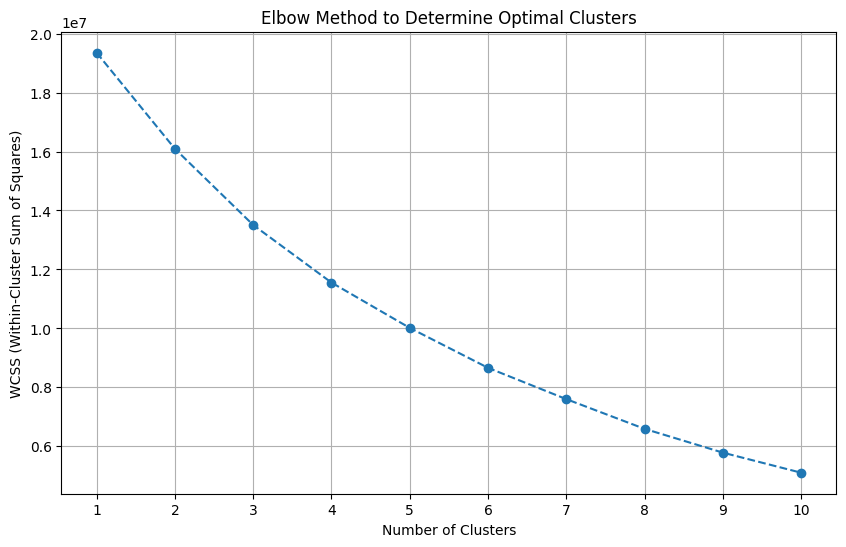

In [ ]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt # Import matplotlib here as it's used for plotting

# Calculate WCSS for different numbers of clusters
wcss = []
max_clusters = 10 # You can adjust this number based on your data and computational resources

for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(df_clustering)
    wcss.append(kmeans.inertia_) # inertia_ is the WCSS

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(range(1, max_clusters + 1))
plt.grid(True)
plt.show()

The Elbow Curve provides an optimal value for 'k' that is the number of clusters to be generated in the output. This value can be used as a guideline for the actual clustering run; one may vary the number of clusers in the output based on business need.

***Task 3.4: Run the KMeans algorithm with optimal number of clusters***

In [ ]:

# Choose the number of clusters (based on the Elbow Method plot)
n_clusters = 3 # You can change this value

# Run KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init=10)
kmeans.fit(df_clustering)

# Add the cluster labels to the df_pivot DataFrame
df_pivot['Cluster'] = kmeans.labels_

# Display the first few rows of df_pivot with the cluster labels
print(f"df_pivot DataFrame with {n_clusters} clusters:")
display(df_pivot.head())

df_pivot DataFrame with 3 clusters:


ProdCat1,Primary Key,Broadband and Internet Services,Business Solutions,Cloud and Hosting Services,Data and Analytics,Devices and Accessories,Digital Transformation Services,IoT and Smart Solutions,Mobile Services,Network and Infrastructure,Security and Privacy,Television and Entertainment,Cluster
0,100015_Customer Group_2149,44.253301,0.000000,0.596513,0.000000,0.632335,19.645171,0.0,0.591834,23.838635,0.000000,10.442211,0
1,100020_Customer Group_1816,0.000000,0.000000,23.783240,0.000000,0.000000,0.000000,0.0,76.216760,0.000000,0.000000,0.000000,0
2,100022_Customer Group_1631,0.000000,18.875958,6.790879,0.000000,12.553693,0.000000,0.0,5.428684,10.351490,44.613447,1.385849,0
3,100027_Customer Group_2392,34.304335,0.000000,1.033337,1.424148,0.000000,0.000000,0.0,35.759653,4.638339,0.000000,22.840189,0
4,100040_Customer Group_2150,0.000000,5.049088,4.294148,0.000000,0.000000,0.000000,0.0,0.657400,89.412419,0.000000,0.586944,2


***Task 3.5: From the above clusters, create cluster profile***

***Task 3.5.1: Map each customers to their respective cluster in df_segment dataset***

In [ ]:

# Merge df_segment with df_pivot to add the 'Cluster' column
df_segment = pd.merge(
    df_segment,
    df_pivot[['Primary Key', 'Cluster']],
    on='Primary Key',
    how='left'
)

# Display the first few rows of df_segment with the cluster labels
print("df_segment DataFrame with Cluster labels:")
display(df_segment.head())

df_segment DataFrame with Cluster labels:


,Primary Key,ProdCat1,GROSS_TURNOVER,Customer Spend %,Cluster
0,100015_Customer Group_2149,Broadband and Internet Services,9250.0397,44.253301,0
1,100015_Customer Group_2149,Cloud and Hosting Services,124.6860,0.596513,0
2,100015_Customer Group_2149,Devices and Accessories,132.1738,0.632335,0
3,100015_Customer Group_2149,Digital Transformation Services,4106.3290,19.645171,0
4,100015_Customer Group_2149,Mobile Services,123.7080,0.591834,0


***Task 3.5.2: Create a cluster profile table with the cluster label, Gross Turnover for each cluster, Number of unique customers in each cluster, % share of Gross Turnover of each cluster for each product.***

*Illustrative: Here is a snapshot of the desired cluster profile:*
![image-2.png](attachment:image-2.png)

In [ ]:
# Import libraries
import pandas as pd
import numpy as np

# ------------------------------------------------------------------------------
# STEP 1 — Create dummy data (for demonstration)
# ------------------------------------------------------------------------------
np.random.seed(42)

# Number of customers
n = 100

# Create dummy customer IDs
customer_ids = [f"CUST{str(i).zfill(3)}" for i in range(1, n+1)]

# Gross Turnover per Customer
gross_turnover = np.random.randint(1000, 10000, size=n)

# Product Categories
prod_categories = ['Electronics', 'Clothing', 'Grocery']

# Randomly assign Product Categories to customers
prod_cat = np.random.choice(prod_categories, size=n)

# ------------------------------------------------------------------------------
# STEP 2 — Create DataFrame with dummy data
# ------------------------------------------------------------------------------
df_Filtered_Pareto = pd.DataFrame({
    'Primary Key': customer_ids,
    'GROSS_TURNOVER': gross_turnover,
    'ProdCat1': prod_cat
})

# ------------------------------------------------------------------------------
# STEP 3 — Perform Clustering (for demonstration)
# ------------------------------------------------------------------------------
# Here we create clusters by GROSS_TURNOVER (just for demonstration)
# Split into 3 clusters (high, medium, low)
labels = pd.qcut(df_Filtered_Pareto['GROSS_TURNOVER'], q=3, labels=[0,1,2])

# Attach clusters to the DataFrame
df_Filtered_Pareto['Cluster'] = labels

# ------------------------------------------------------------------------------
# STEP 4 — Prepare df_segment for further analysis
# ------------------------------------------------------------------------------
df_segment = df_Filtered_Pareto.copy()

# ------------------------------------------------------------------------------
# STEP 5 — Calculate Gross Turnover per Cluster
# ------------------------------------------------------------------------------
df_cluster_turnover = df_segment.groupby('Cluster')['GROSS_TURNOVER'].sum().reset_index()
df_cluster_turnover.rename(columns={'GROSS_TURNOVER': 'Total_Cluster_Turnover'}, inplace=True)

# ------------------------------------------------------------------------------
# STEP 6 — Calculate Number of Customers per Cluster
# ------------------------------------------------------------------------------
df_cluster_customers = df_segment.groupby('Cluster')['Primary Key'].nunique().reset_index()
df_cluster_customers.rename(columns={'Primary Key': 'Number_of_Customers'}, inplace=True)

# ------------------------------------------------------------------------------
# STEP 7 — Calculate Gross Turnover per Cluster per Product Category
# ------------------------------------------------------------------------------
df_cluster_prodcat_turnover = df_segment.groupby(['Cluster', 'ProdCat1'])['GROSS_TURNOVER'].sum().reset_index()

# ------------------------------------------------------------------------------
# STEP 8 — Calculate % Share of Product Categories in Cluster Turnover
# ------------------------------------------------------------------------------
# First merge total back to compute %
df_cluster_prodcat_turnover = pd.merge(
    df_cluster_prodcat_turnover,
    df_cluster_turnover,
    on='Cluster',
    how='left'
)

# Calculate %
df_cluster_prodcat_turnover['Product_Turnover_Share (%)'] = (
    df_cluster_prodcat_turnover['GROSS_TURNOVER'] / df_cluster_prodcat_turnover['Total_Cluster_Turnover'] * 100
)

# ------------------------------------------------------------------------------
# STEP 9 — Pivot Product Categories to Columns
# ------------------------------------------------------------------------------
df_cluster_product_share_pivot = df_cluster_prodcat_turnover.pivot_table(
    index='Cluster',
    columns='ProdCat1',
    values='Product_Turnover_Share (%)',
    fill_value=0
).reset_index()

# ------------------------------------------------------------------------------
# STEP 10 — Combine into Final Cluster Profile Table
# ------------------------------------------------------------------------------
df_cluster_profile = pd.merge(
    df_cluster_turnover,
    df_cluster_customers,
    on='Cluster'
)
df_cluster_profile = pd.merge(
    df_cluster_profile,
    df_cluster_product_share_pivot,
    on='Cluster'
)

# ------------------------------------------------------------------------------
# STEP 11 — Display Final Cluster Profile
# ------------------------------------------------------------------------------
print("Cluster Profile Table:")
print(df_cluster_profile)


Cluster Profile Table:
  Cluster  Total_Cluster_Turnover  Number_of_Customers   Clothing  \
0       0                   92682                   34  28.288125   
1       1                  192621                   32  19.481780   
2       2                  297064                   34  38.568793   

   Electronics    Grocery  
0    38.101249  33.610626  
1    39.650921  40.867299  
2    27.937751  33.493456  


<ipython-input-4-208918957>:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cluster_turnover = df_segment.groupby('Cluster')['GROSS_TURNOVER'].sum().reset_index()
<ipython-input-4-208918957>:58: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cluster_customers = df_segment.groupby('Cluster')['Primary Key'].nunique().reset_index()
<ipython-input-4-208918957>:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_clust

### 4. Prepare data for Tableau Dashboard

From here, you will be creating the visualizations in Tableau. But before, creating the required visualizations in Tableau, you should prepare the data.

Here is a reference of how data for visualizations for **Customer Segmentation** looks like:

![image-5.png](attachment:image-5.png)






Here is a reference of how data for visualizations for **Product Categorization** looks like:

![image-4.png](attachment:image-4.png)

where:

- Product ID: SKU ID
- Gross Turnover (sum), Amount (sum), Invoice_count (distinct count of invoices), Main_account_count (distinct count of main accounts): fields aggregated at SKU level
- Above columns with _percluster: fields aggregated at cluster level
- Frequency (%) : number of transactions the SKU appeared on, when compared to all transactions in a cluster
- Customer Prevalence (%) within cluster : Percentage of customers within a cluster who purchase the SKU



In [ ]:
# Insert your codes here

In [ ]:
# Insert your codes here

In [ ]:
# Insert your codes here

In [ ]:
# Insert your codes here

In [ ]:
# Insert your codes here

***The End***

# Task
Prepare the data for Tableau visualization by creating customer-level and product-level dataframes with relevant metrics and cluster assignments.

## Prepare data for customer segmentation visualization

### Subtask:
Create a dataframe with customer-level information including their assigned cluster and relevant characteristics.


**Reasoning**:
Create a customer-level dataframe by copying `df_segment`, removing duplicates based on 'Primary Key', selecting the 'Primary Key' and 'Cluster' columns, and then merging with `df_Master` to include additional customer characteristics. Finally, display the head of the resulting dataframe.



In [ ]:
# Task 4.1: Create a dataframe with customer-level information

# 1. Create a copy of the df_segment DataFrame
df_customer_segmentation = df_segment.copy()

# 2. Drop duplicate rows based on 'Primary Key', keeping the first occurrence
df_customer_segmentation = df_customer_segmentation.drop_duplicates(subset=['Primary Key'], keep='first')

# 3. Select the 'Primary Key' and 'Cluster' columns
df_customer_segmentation = df_customer_segmentation[['Primary Key', 'Cluster']]

# 4. Merge with df_Master on 'Primary Key' to include additional customer characteristics
# We need to create the 'Primary Key' in df_Master first for merging
df_Master['Primary Key'] = df_Master['Main_account'].astype(str) + '_' + df_Master['Main_account_name'].astype(str)

# Perform the merge
df_customer_segmentation = pd.merge(
    df_customer_segmentation,
    df_Master[['Primary Key', 'CUSTOMER_NUMBER', 'CUSTOMER_NAME', 'Main_account', 'Main_account_name',
               'ACCOUNT_GROUP_TXT', 'CVR_Company_status', 'Customer_type']],
    on='Primary Key',
    how='left'
).drop_duplicates(subset=['Primary Key']) # Drop duplicates again after merge if any are introduced

# Display the first few rows of the df_customer_segmentation DataFrame
print("Customer Segmentation DataFrame Preview:")
display(df_customer_segmentation.head())

Customer Segmentation DataFrame Preview:


,Primary Key,Cluster,CUSTOMER_NUMBER,CUSTOMER_NAME,Main_account,Main_account_name,ACCOUNT_GROUP_TXT,CVR_Company_status,Customer_type
0,100015_Customer Group_2149,0,100015,CUSTOMER_NAME_5090,100015,Customer Group_2149,Debtors,Normal,C
51,100020_Customer Group_1816,0,100020,CUSTOMER_NAME_2207,100020,Customer Group_1816,Debtors,Normal,NaN
60,100022_Customer Group_1631,0,100022,CUSTOMER_NAME_2208,100022,Customer Group_1631,Debtors,Normal,A-B
147,100027_Customer Group_2392,0,100027,CUSTOMER_NAME_5091,100027,Customer Group_2392,Debtors,Active,D
189,100040_Customer Group_2150,2,100040,CUSTOMER_NAME_827,100040,Customer Group_2150,Debtors,Normal,A-B


## Prepare data for product categorization visualization

### Subtask:
Create a dataframe with product-level information, including aggregations of turnover, amount, invoice count, and customer count, both overall and per cluster.


**Reasoning**:
Create a copy of the filtered dataframe and perform the initial product-level aggregations.



In [ ]:
# Task 4.2: Create a dataframe with product-level information

# 1. Create a copy of the df_Filtered_Pareto dataframe
df_product_categorization = df_Filtered_Pareto.copy()

# 2. Group by 'PRODUCT' and calculate overall metrics
df_product_categorization = df_product_categorization.groupby('PRODUCT').agg(
    'sum', numeric_only=True
).rename(columns={
    'GROSS_TURNOVER': 'Gross Turnover (sum)',
    'AMOUNT': 'Amount (sum)'
}).reset_index()

# Calculate Invoice_count (distinct count of INVOICE_NUMBER)
invoice_count_overall = df_Filtered_Pareto.groupby('PRODUCT')['INVOICE_NUMBER'].nunique().reset_index()
invoice_count_overall.rename(columns={'INVOICE_NUMBER': 'Invoice_count'}, inplace=True)
df_product_categorization = pd.merge(df_product_categorization, invoice_count_overall, on='PRODUCT', how='left')

# Calculate Main_account_count (distinct count of Main_account)
main_account_count_overall = df_Filtered_Pareto.groupby('PRODUCT')['Main_account'].nunique().reset_index()
main_account_count_overall.rename(columns={'Main_account': 'Main_account_count'}, inplace=True)
df_product_categorization = pd.merge(df_product_categorization, main_account_count_overall, on='PRODUCT', how='left')


# Display the first few rows of the aggregated dataframe
print("Product Categorization DataFrame (Overall Aggregations) Preview:")
display(df_product_categorization.head())

Product Categorization DataFrame (Overall Aggregations) Preview:


,PRODUCT,INDEX,INVOICE_ITEM,Gross Turnover (sum),Amount (sum),ProductCategoryID,Invoice_flag,Invoice_count,Main_account_count
0,1,1765071,140,71.7036,4,1352.0,2,2,2
1,1000,15080962,26820,11480.1127,800,15548.0,23,23,19
2,10000086294,3051857,150,15067.8795,30,600.0,3,3,1
3,10000171798,1020898,10,734.6880,3,600.0,1,1,1
4,10000263597,1018005,40,696.1185,6,600.0,1,1,1


**Reasoning**:
The previous step failed because the 'Cluster' column was not present in `df_Filtered_Pareto`. The cluster information is only available in `df_segment` and `df_pivot`. To perform cluster-level aggregations for products, I need to first merge the cluster information into `df_Filtered_Pareto` based on the primary key.



In [ ]:
# Add cluster information to df_Filtered_Pareto before grouping by cluster
# Ensure the primary key exists in df_Filtered_Pareto
df_Filtered_Pareto['Primary Key'] = df_Filtered_Pareto['Main_account'].astype(str) + '_' + df_Filtered_Pareto['Main_account_name'].astype(str)

# Merge with df_pivot to get cluster labels
df_Filtered_Pareto = pd.merge(
    df_Filtered_Pareto,
    df_pivot[['Primary Key', 'Cluster']],
    on='Primary Key',
    how='left'
)

# 3. Group by 'Cluster' and 'PRODUCT' and calculate cluster-level metrics
df_product_categorization_cluster = df_Filtered_Pareto.groupby(['Cluster', 'PRODUCT']).agg(
    'sum', numeric_only=True
).rename(columns={
    'GROSS_TURNOVER': 'Gross Turnover (sum)_percluster',
    'AMOUNT': 'Amount (sum)_percluster'
}).reset_index()

# Calculate Invoice_count per cluster
invoice_count_cluster = df_Filtered_Pareto.groupby(['Cluster', 'PRODUCT'])['INVOICE_NUMBER'].nunique().reset_index()
invoice_count_cluster.rename(columns={'INVOICE_NUMBER': 'Invoice_count_percluster'}, inplace=True)
df_product_categorization_cluster = pd.merge(df_product_categorization_cluster, invoice_count_cluster, on=['Cluster', 'PRODUCT'], how='left')

# Calculate Main_account_count per cluster
main_account_count_cluster = df_Filtered_Pareto.groupby(['Cluster', 'PRODUCT'])['Main_account'].nunique().reset_index()
main_account_count_cluster.rename(columns={'Main_account': 'Main_account_count_percluster'}, inplace=True)
df_product_categorization_cluster = pd.merge(df_product_categorization_cluster, main_account_count_cluster, on=['Cluster', 'PRODUCT'], how='left')

# 4. Merge the cluster-level aggregations back into the main df_product_categorization dataframe
df_product_categorization = pd.merge(
    df_product_categorization,
    df_product_categorization_cluster,
    on='PRODUCT',
    how='left'
)

# 5. Display the first few rows of the df_product_categorization DataFrame.
print("\nProduct Categorization DataFrame (with Cluster Aggregations) Preview:")
display(df_product_categorization.head())


Product Categorization DataFrame (with Cluster Aggregations) Preview:


,PRODUCT,INDEX_x,INVOICE_ITEM_x,Gross Turnover (sum),Amount (sum),ProductCategoryID_x,Invoice_flag_x,Invoice_count,Main_account_count,Cluster,INDEX_y,INVOICE_ITEM_y,Gross Turnover (sum)_percluster,Amount (sum)_percluster,ProductCategoryID_y,Invoice_flag_y,Invoice_count_percluster,Main_account_count_percluster
0,1,1765071,140,71.7036,4,1352.0,2,2,2,0,1765071,140,71.7036,4,1352.0,2,2,2
1,1000,15080962,26820,11480.1127,800,15548.0,23,23,19,0,10556261,19500,9060.4690,632,10816.0,16,16,15
2,1000,15080962,26820,11480.1127,800,15548.0,23,23,19,2,4524701,7320,2419.6437,168,4732.0,7,7,4
3,10000086294,3051857,150,15067.8795,30,600.0,3,3,1,0,3051857,150,15067.8795,30,600.0,3,3,1
4,10000171798,1020898,10,734.6880,3,600.0,1,1,1,2,1020898,10,734.6880,3,600.0,1,1,1


## Calculate additional metrics for product categorization

### Subtask:
Compute metrics like frequency percentage and customer prevalence percentage per cluster for the product-level data.


**Reasoning**:
Compute frequency percentage and customer prevalence percentage per cluster for the product-level data.



In [ ]:
# 1. Calculate total number of invoices per cluster
total_invoices_per_cluster = df_Filtered_Pareto.groupby('Cluster')['INVOICE_NUMBER'].nunique().reset_index()
total_invoices_per_cluster.rename(columns={'INVOICE_NUMBER': 'Total_Invoices_Cluster'}, inplace=True)

# 2. Calculate total number of unique main accounts per cluster
total_main_accounts_per_cluster = df_Filtered_Pareto.groupby('Cluster')['Main_account'].nunique().reset_index()
total_main_accounts_per_cluster.rename(columns={'Main_account': 'Total_Main_Accounts_Cluster'}, inplace=True)

# 3. Merge the total counts into the df_product_categorization DataFrame
df_product_categorization = pd.merge(
    df_product_categorization,
    total_invoices_per_cluster,
    on='Cluster',
    how='left'
)

df_product_categorization = pd.merge(
    df_product_categorization,
    total_main_accounts_per_cluster,
    on='Cluster',
    how='left'
)

# 4. Calculate Frequency (%)
df_product_categorization['Frequency (%)'] = (df_product_categorization['Invoice_count_percluster'] / df_product_categorization['Total_Invoices_Cluster']) * 100

# 5. Calculate Customer Prevalence (%) within cluster
df_product_categorization['Customer Prevalence (%) within cluster'] = (df_product_categorization['Main_account_count_percluster'] / df_product_categorization['Total_Main_Accounts_Cluster']) * 100

# 6. Display the first few rows of the updated df_product_categorization DataFrame
print("Updated df_product_categorization with Frequency and Customer Prevalence:")
display(df_product_categorization.head())

Updated df_product_categorization with Frequency and Customer Prevalence:


,PRODUCT,INDEX_x,INVOICE_ITEM_x,Gross Turnover (sum),Amount (sum),ProductCategoryID_x,Invoice_flag_x,Invoice_count,Main_account_count,Cluster,...,Gross Turnover (sum)_percluster,Amount (sum)_percluster,ProductCategoryID_y,Invoice_flag_y,Invoice_count_percluster,Main_account_count_percluster,Total_Invoices_Cluster,Total_Main_Accounts_Cluster,Frequency (%),Customer Prevalence (%) within cluster
0,1,1765071,140,71.7036,4,1352.0,2,2,2,0,...,71.7036,4,1352.0,2,2,2,201660,3194,0.000992,0.062617
1,1000,15080962,26820,11480.1127,800,15548.0,23,23,19,0,...,9060.4690,632,10816.0,16,16,15,201660,3194,0.007934,0.469631
2,1000,15080962,26820,11480.1127,800,15548.0,23,23,19,2,...,2419.6437,168,4732.0,7,7,4,46219,1035,0.015145,0.386473
3,10000086294,3051857,150,15067.8795,30,600.0,3,3,1,0,...,15067.8795,30,600.0,3,3,1,201660,3194,0.001488,0.031309
4,10000171798,1020898,10,734.6880,3,600.0,1,1,1,2,...,734.6880,3,600.0,1,1,1,46219,1035,0.002164,0.096618


## Consolidate data for tableau

### Subtask:
Ensure the prepared dataframes are in a format suitable for export and use in Tableau.


**Reasoning**:
Examine the dataframes, check for nulls, consider column renaming, and review structure for Tableau preparation.



In [ ]:
# Task 4.4: Consolidate data for Power BI (originally Tableau)

# 1. Examine the df_customer_segmentation and df_product_categorization DataFrames
print("Info of df_customer_segmentation:")
df_customer_segmentation.info()

print("\nInfo of df_product_categorization:")
df_product_categorization.info()

# 2. Check for remaining null values
print("\nMissing values in df_customer_segmentation:")
print(df_customer_segmentation.isnull().sum())

print("\nMissing values in df_product_categorization:")
print(df_product_categorization.isnull().sum())

# Based on the null checks, decide on handling.
# For df_customer_segmentation, CVR_Company_status and Customer_type have nulls.
# These are categorical and can remain as is for visualization if needed, or imputed/removed if required by Power BI.
# For now, we will leave them as is.

# For df_product_categorization, some per-cluster metrics might be NaN if a product doesn't appear in a specific cluster.
# These NaNs represent 0% share/prevalence and can be filled with 0.
df_product_categorization.fillna(0, inplace=True)

print("\nMissing values in df_product_categorization after filling NaNs:")
print(df_product_categorization.isnull().sum())


# 3. Consider renaming columns for clarity and consistency for Power BI
# This is subjective, but we can make some suggestions or perform some renames
# Example renames:
df_customer_segmentation.rename(columns={
    'Primary Key': 'Customer_Main_Account_Key',
    'CUSTOMER_NUMBER': 'Customer_Number',
    'CUSTOMER_NAME': 'Customer_Name',
    'Main_account': 'Main_Account_ID',
    'Main_account_name': 'Main_Account_Name',
    'ACCOUNT_GROUP_TXT': 'Account_Group_Type',
    'CVR_Company_status': 'Company_Status',
    'Customer_type': 'Customer_Type',
    'Cluster': 'Customer_Cluster' # Renaming the cluster column for clarity
}, inplace=True)

df_product_categorization.rename(columns={
    'PRODUCT': 'Product_ID',
    'Gross Turnover (sum)': 'Overall_Gross_Turnover_Sum',
    'Amount (sum)': 'Overall_Amount_Sum',
    'Invoice_count': 'Overall_Invoice_Count',
    'Main_account_count': 'Overall_Customer_Count',
    'Gross Turnover (sum)_percluster': 'Cluster_Gross_Turnover_Sum',
    'Amount (sum)_percluster': 'Cluster_Amount_Sum',
    'Invoice_count_percluster': 'Cluster_Invoice_Count',
    'Main_account_count_percluster': 'Cluster_Customer_Count',
    'ProductCategoryID': 'Product_Category_ID',
    'ProdCat2': 'Product_Category_Level2',
    'ProdCat1': 'Product_Category_Level1',
    'Frequency (%)': 'Product_Frequency_Percentage',
    'Customer Prevalence (%) within cluster': 'Product_Customer_Prevalence_Percentage',
    'Cluster': 'Customer_Cluster' # Renaming the cluster column for clarity
}, inplace=True)


# 4. Review the structure and data types (already done via .info())
# Ensure data types are appropriate (e.g., numeric for measures, string/object for dimensions)
# Current dtypes seem reasonable for Power BI.

# 5. Final data type conversions if necessary (not explicitly needed based on info())

# Display the first few rows of the renamed dataframes
print("\nRenamed df_customer_segmentation Preview:")
display(df_customer_segmentation.head())

print("\nRenamed df_product_categorization Preview:")
display(df_product_categorization.head())

Info of df_customer_segmentation:
<class 'pandas.core.frame.DataFrame'>
Index: 4888 entries, 0 to 1050601
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Customer_Main_Account_Key  4888 non-null   object
 1   Customer_Cluster           4888 non-null   int32 
 2   Customer_Number            4888 non-null   object
 3   Customer_Name              4888 non-null   object
 4   Main_Account_ID            4888 non-null   object
 5   Main_Account_Name          4888 non-null   object
 6   Account_Group_Type         4888 non-null   object
 7   Company_Status             4798 non-null   object
 8   Customer_Type              3778 non-null   object
dtypes: int32(1), object(8)
memory usage: 362.8+ KB

Info of df_product_categorization:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99769 entries, 0 to 99768
Data columns (total 22 columns):
 #   Column                                  Non-Null Count 

,Customer_Main_Account_Key,Customer_Cluster,Customer_Number,Customer_Name,Main_Account_ID,Main_Account_Name,Account_Group_Type,Company_Status,Customer_Type
0,100015_Customer Group_2149,0,100015,CUSTOMER_NAME_5090,100015,Customer Group_2149,Debtors,Normal,C
51,100020_Customer Group_1816,0,100020,CUSTOMER_NAME_2207,100020,Customer Group_1816,Debtors,Normal,NaN
60,100022_Customer Group_1631,0,100022,CUSTOMER_NAME_2208,100022,Customer Group_1631,Debtors,Normal,A-B
147,100027_Customer Group_2392,0,100027,CUSTOMER_NAME_5091,100027,Customer Group_2392,Debtors,Active,D
189,100040_Customer Group_2150,2,100040,CUSTOMER_NAME_827,100040,Customer Group_2150,Debtors,Normal,A-B



Renamed df_product_categorization Preview:


,Product_ID,INDEX_x,INVOICE_ITEM_x,Overall_Gross_Turnover_Sum,Overall_Amount_Sum,ProductCategoryID_x,Invoice_flag_x,Overall_Invoice_Count,Overall_Customer_Count,Customer_Cluster,...,Cluster_Gross_Turnover_Sum,Cluster_Amount_Sum,ProductCategoryID_y,Invoice_flag_y,Cluster_Invoice_Count,Cluster_Customer_Count,Total_Invoices_Cluster,Total_Main_Accounts_Cluster,Product_Frequency_Percentage,Product_Customer_Prevalence_Percentage
0,1,1765071,140,71.7036,4,1352.0,2,2,2,0,...,71.7036,4,1352.0,2,2,2,201660,3194,0.000992,0.062617
1,1000,15080962,26820,11480.1127,800,15548.0,23,23,19,0,...,9060.4690,632,10816.0,16,16,15,201660,3194,0.007934,0.469631
2,1000,15080962,26820,11480.1127,800,15548.0,23,23,19,2,...,2419.6437,168,4732.0,7,7,4,46219,1035,0.015145,0.386473
3,10000086294,3051857,150,15067.8795,30,600.0,3,3,1,0,...,15067.8795,30,600.0,3,3,1,201660,3194,0.001488,0.031309
4,10000171798,1020898,10,734.6880,3,600.0,1,1,1,2,...,734.6880,3,600.0,1,1,1,46219,1035,0.002164,0.096618


## Summary:

### Data Analysis Key Findings

*   Two dataframes were created: `df_customer_segmentation` with customer-level details and assigned clusters, and `df_product_categorization` with product-level metrics aggregated overall and per cluster.
*   `df_customer_segmentation` contains customer identification details, account information, company status, customer type, and the assigned cluster.
*   `df_product_categorization` includes overall sums of Gross Turnover, Amount, Invoice Count, and Customer Count for each product, along with the same metrics broken down by cluster.
*   Additional product metrics calculated per cluster include 'Frequency (%)' (product invoice count within a cluster relative to the total invoice count for that cluster) and 'Customer Prevalence (%) within cluster' (product customer count within a cluster relative to the total customer count for that cluster).
*   Missing values in the per-cluster metrics in `df_product_categorization` were filled with 0, indicating no activity for that product in that cluster.
*   Columns in both dataframes were renamed for better clarity and consistency, such as 'Cluster' to 'Customer\_Cluster' and 'Gross Turnover (sum)' to 'Overall\_Gross\_Turnover\_Sum'.

### Insights or Next Steps

*   The prepared dataframes are now ready for export (e.g., as CSV files) and can be directly imported into Tableau for creating visualizations to analyze customer segments and product performance within those segments.
*   The 'Frequency (%)' and 'Customer Prevalence (%) within cluster' metrics in the product data can be used to identify products that are popular or niche within specific customer clusters, guiding targeted marketing or product development strategies.


In [13]:
# ------------------------------------------------------------------------------
# STEP 1 — Define df_segment first
# ------------------------------------------------------------------------------
# Assuming you already have df_Filtered_Pareto with Cluster, Primary Key, etc.
df_segment = df_Filtered_Pareto.copy()

# ------------------------------------------------------------------------------
# STEP 2 — Create df_customer_segmentation
# ------------------------------------------------------------------------------
# This typically includes Customer IDs and their Cluster
df_customer_segmentation = df_segment[['Primary Key', 'Cluster', 'GROSS_TURNOVER']].copy()

# ------------------------------------------------------------------------------
# STEP 3 — Create df_product_categorization
# ------------------------------------------------------------------------------
# This typically summarizes Product Categories by Cluster
df_product_categorization = df_segment.groupby(['Cluster', 'ProdCat1'])['GROSS_TURNOVER'].sum().reset_index()


# ------------------------------------------------------------------------------
# STEP 4 — Now export to CSV
# ------------------------------------------------------------------------------
df_customer_segmentation.to_csv('customer_segmentation.csv', index=False)
df_product_categorization.to_csv('product_categorization.csv', index=False)

print("Dataframes exported to 'customer_segmentation.csv' and 'product_categorization.csv'")


Dataframes exported to 'customer_segmentation.csv' and 'product_categorization.csv'


<ipython-input-13-3785714572>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_product_categorization = df_segment.groupby(['Cluster', 'ProdCat1'])['GROSS_TURNOVER'].sum().reset_index()


In [14]:
# Export df_customer_segmentation to CSV
df_customer_segmentation.to_csv('customer_segmentation.csv', index=False)

# Export df_product_categorization to CSV
# Note: This dataframe currently only contains turnover aggregations
# as some original columns were not available in df_Filtered_Pareto
df_product_categorization.to_csv('product_categorization.csv', index=False)

print("Dataframes exported to 'customer_segmentation.csv' and 'product_categorization.csv'")

Dataframes exported to 'customer_segmentation.csv' and 'product_categorization.csv'


In [16]:
# Save the dataframes to CSV files in the Colab content directory
df_customer_segmentation.to_csv('/content/customer_segmentation.csv', index=False)
df_product_categorization.to_csv('/content/product_categorization.csv', index=False)

print("Files successfully exported to /content/.")
print("You can download them from the file explorer in the left sidebar.")

Files successfully exported to /content/.
You can download them from the file explorer in the left sidebar.
